In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data Exploration

In [4]:
df.drop("Id",axis=1,inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df["Species"]=df["Species"].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [12]:
df.drop("Species",axis=1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


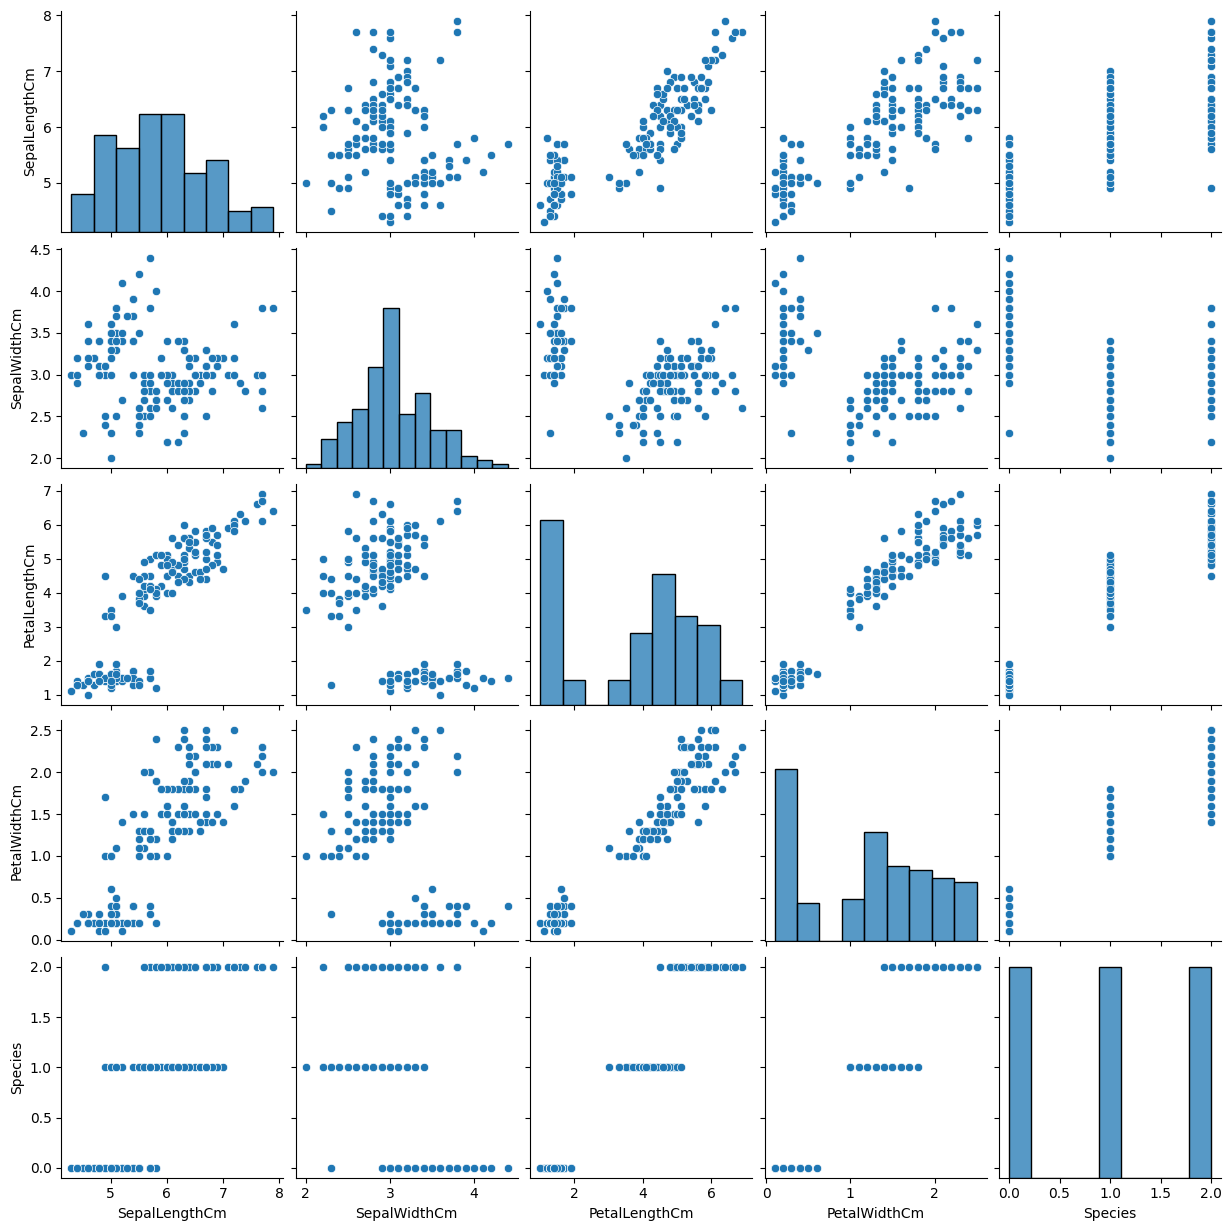

In [13]:
sns.pairplot(df)

<Axes: >

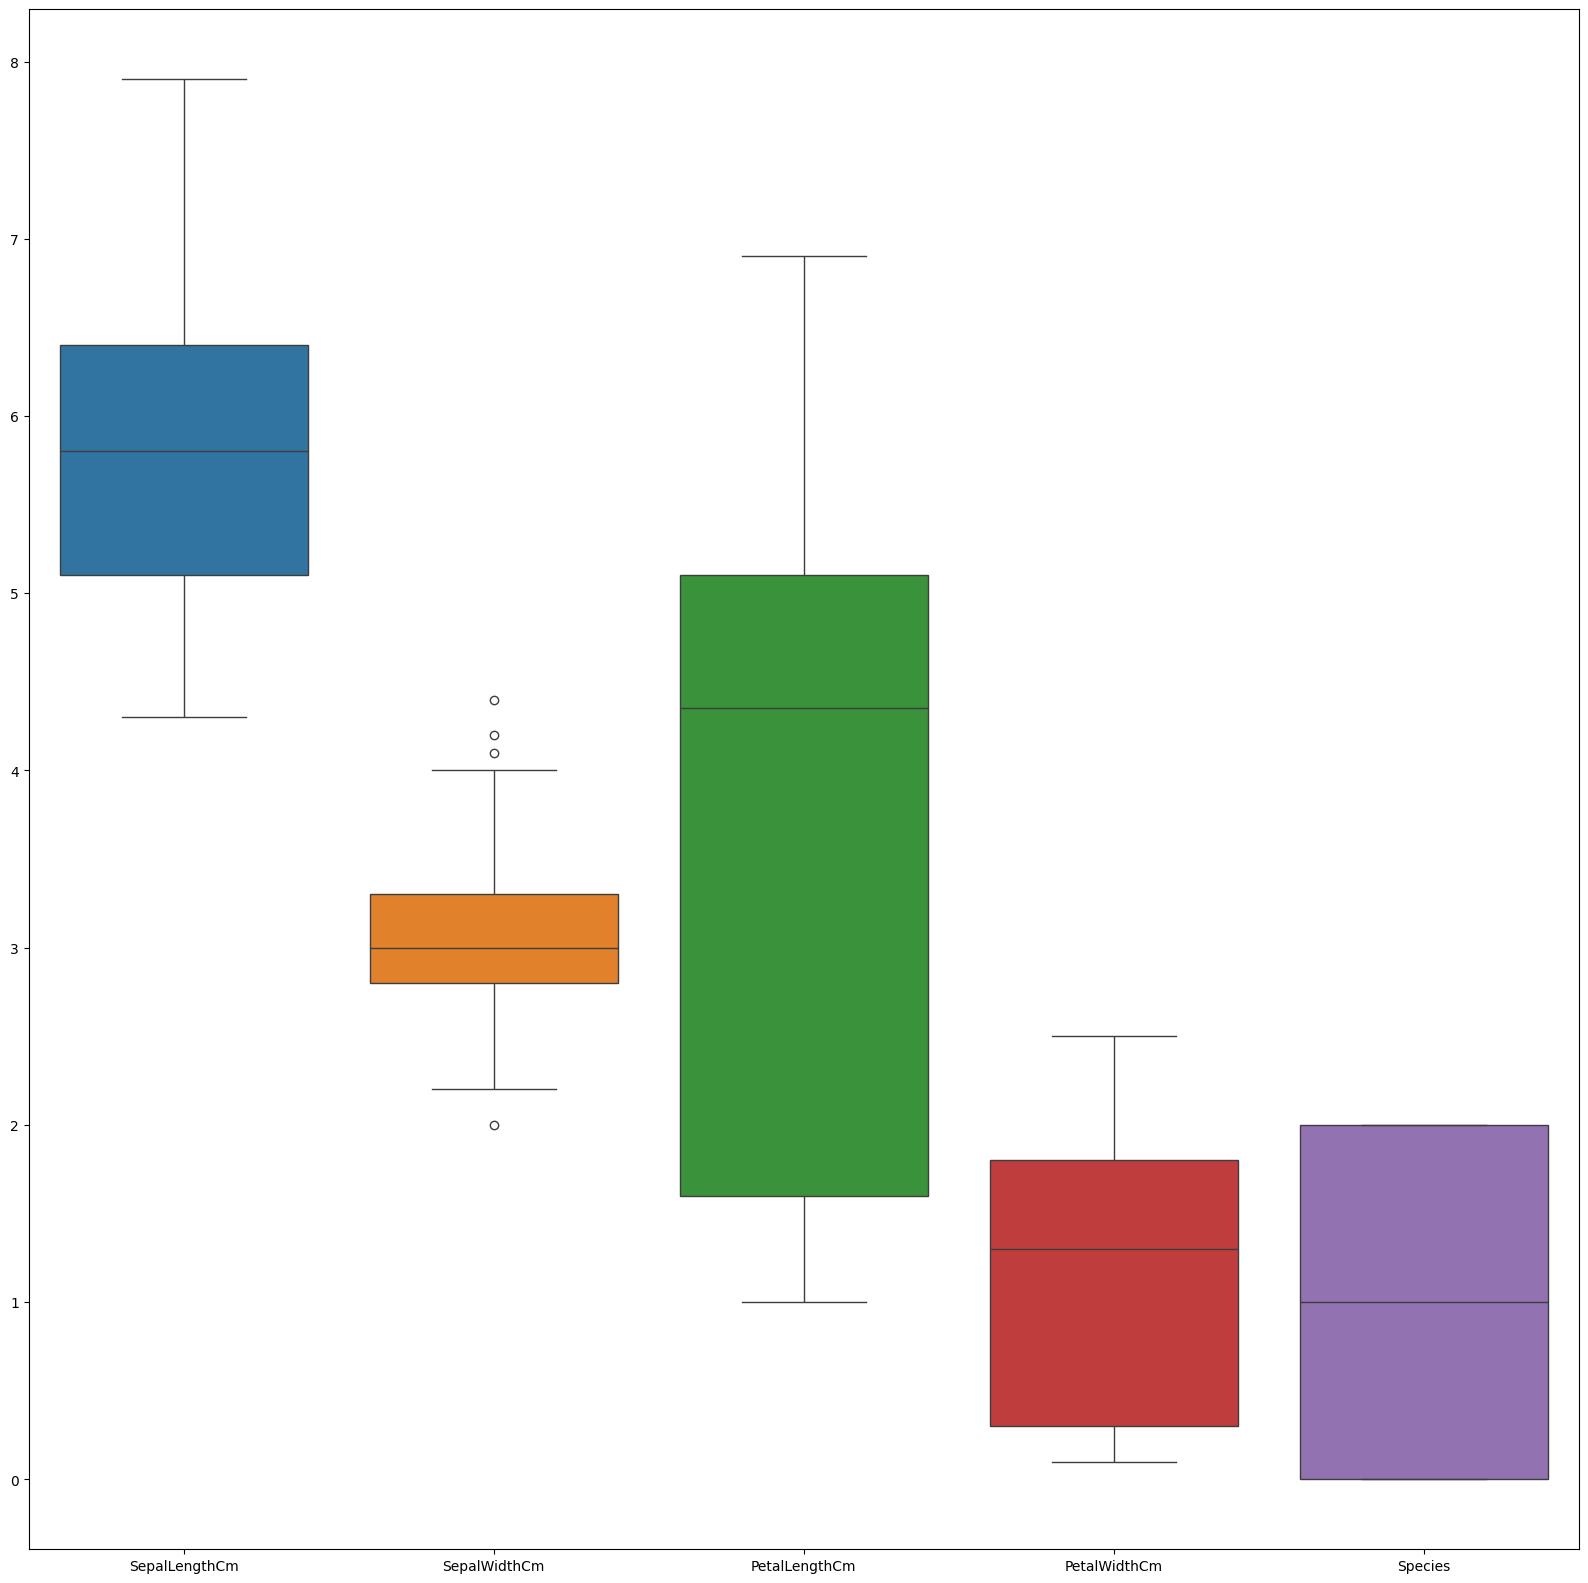

In [14]:
plt.figure(figsize=(20,20))
sns.boxplot(df)

<Figure size 1000x1000 with 0 Axes>

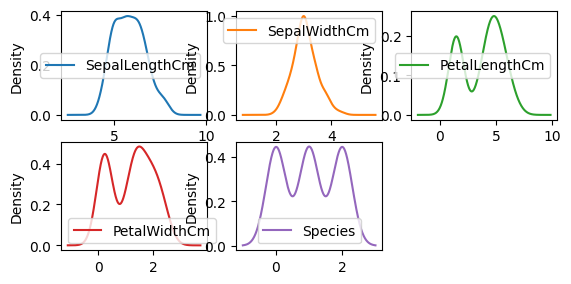

In [15]:
plt.figure(figsize=(10,10))
df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)
plt.show()

<Axes: >

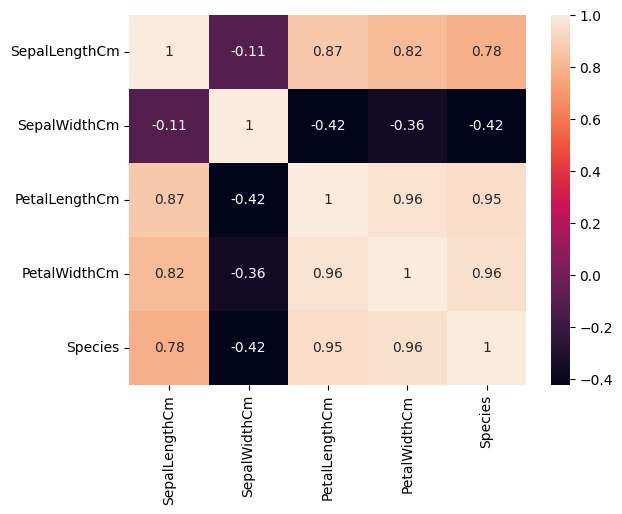

In [16]:
sns.heatmap(df.corr(),annot=True)

Data Spliting

In [17]:
x=df.drop("Species",axis=1)
y=df["Species"]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Model Training

In [19]:
models={'LogisticRegression':LogisticRegression(),
        'LogisticRegressionCV':LogisticRegressionCV(),
        'SVC':SVC(),
        'GaussianNB':GaussianNB(),
        'AdaBoostClassifier':AdaBoostClassifier(),
        'ExtraTreesClassifier':ExtraTreesClassifier(),
        'ExtraTreeClassifier':ExtraTreeClassifier(),
        'RandomForestClassifier':RandomForestClassifier(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'KNeighborsClassifier':KNeighborsClassifier()
       }

In [20]:
report={}
for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    report[list(models.keys())[i]]=acc_score

In [21]:
report

{'LogisticRegression': 0.9333333333333333,
 'LogisticRegressionCV': 0.9333333333333333,
 'SVC': 0.9777777777777777,
 'GaussianNB': 0.9333333333333333,
 'AdaBoostClassifier': 0.9333333333333333,
 'ExtraTreesClassifier': 0.9333333333333333,
 'ExtraTreeClassifier': 1.0,
 'RandomForestClassifier': 0.9333333333333333,
 'DecisionTreeClassifier': 0.9333333333333333,
 'KNeighborsClassifier': 0.9333333333333333}

In [22]:
hhg_acc=max(list(report.values()))
index_val=list(report.values()).index(hhg_acc)
high_accuracy_model=list(models.values())[index_val]

In [23]:
high_accuracy_model

ExtraTreeClassifier()

In [24]:
high_accuracy_model.fit(x_train,y_train)

ExtraTreeClassifier()

In [25]:
y_pred=high_accuracy_model.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [27]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  2, 13]], dtype=int64)

<Axes: >

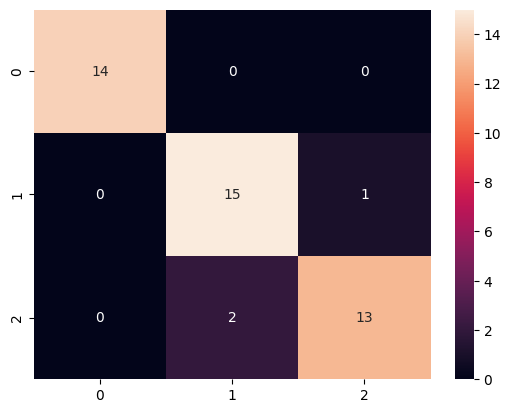

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)